<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/loading_and_preprocessing_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ref: https://www.tensorflow.org/tutorials/load_data/images

In [ ]:
import numpy as np
import PIL
import PIL.Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import  tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
tf.__version__

'2.8.2'

In [ ]:
import pathlib
data_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"


In [ ]:
data_dir = tf.keras.utils.get_file(origin=data_url,
                                   fname='flower_photos',
                                   untar=True)


228827136/228813984 [==============================] - 5s 0us/step


In [ ]:
data_dir  # /root/.keras/datasets/flower_photos

'/root/.keras/datasets/flower_photos'

In [ ]:
type(data_dir)

str

In [ ]:
data_dir = pathlib.Path(data_dir)
data_dir  # PosixPath('/root/.keras/datasets/flower_photos')


PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
type(data_dir)

pathlib.PosixPath

In [ ]:
flower_dir = [i for i in list(data_dir.glob('*/')) if i.is_dir()]

In [ ]:
k = [i for i in flower_dir[0].iterdir()]

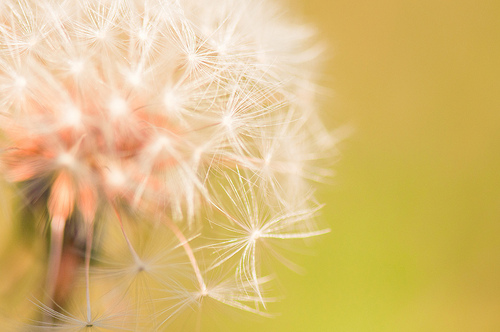

In [ ]:
PIL.Image.open(k[0])

In [ ]:
img = PIL.Image.open(k[0])

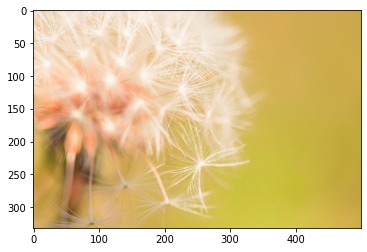

In [ ]:
imshow(np.asarray(img))

In [ ]:
batch_size = 32
img_height = 100
img_width = 100

In [ ]:
from tensorflow.keras.utils import  image_dataset_from_directory

In [ ]:
flower_dir[0]

PosixPath('/root/.keras/datasets/flower_photos/dandelion')

In [ ]:
im = image_dataset_from_directory( data_dir,image_size = (img_height,img_width) , batch_size = batch_size)

Found 3670 files belonging to 5 classes.


In [ ]:
type(im)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = image_dataset_from_directory(data_dir,
                                      subset = "validation",
                                      seed = 989,
                                      image_size = (img_height, img_width),
                                      batch_size = batch_size,
                                      validation_split = 0.2)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
val_ds.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
val_ds.file_paths[:5]

['/root/.keras/datasets/flower_photos/sunflowers/4745980581_a0b7585258_n.jpg',
 '/root/.keras/datasets/flower_photos/dandelion/5655177340_78fc36ce59_m.jpg',
 '/root/.keras/datasets/flower_photos/dandelion/14455605089_8bbfb41cd7_n.jpg',
 '/root/.keras/datasets/flower_photos/dandelion/6229634119_af5fec0a22.jpg',
 '/root/.keras/datasets/flower_photos/daisy/12891819633_e4c82b51e8.jpg']

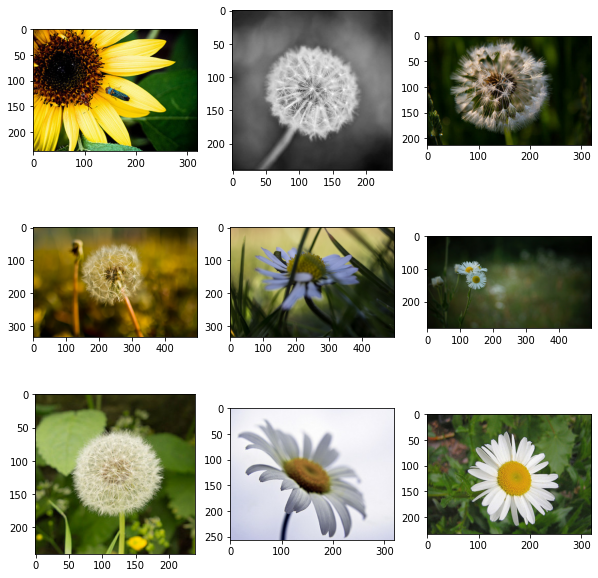

In [ ]:
fig,ax = plt.subplots(3,3, figsize = (10,10))
ax = ax.flatten()
for i in range(len(ax)):
  y = PIL.Image.open(val_ds.file_paths[i])
  y = np.asarray(y)
  ax[i].imshow(y)

In [ ]:
k = train_ds.take(1)

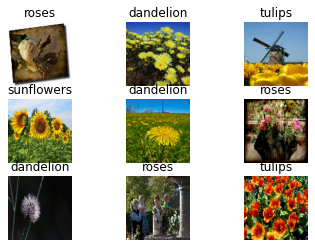

In [ ]:
class_names = train_ds.class_names
plt.Figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for k in range(9):
    ax = plt.subplot(3,3,k+1)
    plt.imshow(images[k].numpy().astype('uint8'))
    plt.title(class_names[labels[k]])
    plt.axis("off")


  

In [ ]:
s[0][0].shape


TensorShape([32, 100, 100, 3])

In [ ]:
len(s[0][1])

32

In [ ]:
for images,labels in train_ds.take(1):
  print(images.shape)

(32, 100, 100, 3)


In [ ]:
for image_batch,labels_batch  in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


## Call libraries

In [9]:
# 1.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential

In [2]:
# 1.1 Display multiple outputs from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Download data

In [3]:
# 2.0 Data URL
data_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

#### keras.utils
See [here](https://www.tensorflow.org/api_docs/python/tf/keras/utils)

In [4]:
# 2.1 Download file from URL. By default, it gets downloaded
#      to ~/.keras/ OR /root/.keras/datasets/flower_photos
# Ref: https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file

data_dir = tf.keras.utils.get_file( fname = "flower_photos",
                                    origin = data_url,
                                    untar = True,
                                  )


# 2.1.1
data_dir

228827136/228813984 [==============================] - 1s 0us/step


'/root/.keras/datasets/flower_photos'

In [6]:
# 2.2 Examine data_dir using pathlib:
#     data_dir is now of Path type

data_dir = pathlib.Path(data_dir)

In [ ]:
# 2.2.1
# What are contents of data_dir?
# Use .iterdir() method of Path class:

[i for i in data_dir.iterdir() ]

[PosixPath('/root/.keras/datasets/flower_photos/LICENSE.txt'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion'),
 PosixPath('/root/.keras/datasets/flower_photos/roses'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers')]

In [8]:
# 2.2.2 List all directories under data_dir:
#       Also use is_dir method of pathlib:

dir_list = [ i for i in data_dir.iterdir() if i.is_dir()]
dir_list

[PosixPath('/root/.keras/datasets/flower_photos/dandelion'),
 PosixPath('/root/.keras/datasets/flower_photos/roses'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers')]

In [14]:
for i in dir_list[0].glob("*"):
  print(i)


/root/.keras/datasets/flower_photos/dandelion/4632251871_9f324a7bb5.jpg
/root/.keras/datasets/flower_photos/dandelion/2478018280_1be353ca8c_m.jpg
/root/.keras/datasets/flower_photos/dandelion/2517777524_e871ec5291_m.jpg
/root/.keras/datasets/flower_photos/dandelion/2294126841_e478564e77_n.jpg
/root/.keras/datasets/flower_photos/dandelion/2387025546_6aecb1b984_n.jpg
/root/.keras/datasets/flower_photos/dandelion/16863587471_cc3a6ffb29_m.jpg
/root/.keras/datasets/flower_photos/dandelion/9011235009_58c7b244c1_n.jpg
/root/.keras/datasets/flower_photos/dandelion/9759608055_9ab623d193.jpg
/root/.keras/datasets/flower_photos/dandelion/14648777167_1d92d403c9_n.jpg
/root/.keras/datasets/flower_photos/dandelion/4562516418_8ccb8c103f.jpg
/root/.keras/datasets/flower_photos/dandelion/4164845062_1fd9b3f3b4.jpg
/root/.keras/datasets/flower_photos/dandelion/4721773235_429acdf496_n.jpg
/root/.keras/datasets/flower_photos/dandelion/3512879565_88dd8fc269_n.jpg
/root/.keras/datasets/flower_photos/dandelio

## Plot flowers

In [ ]:
for i in dir_list:
  plt.subplot(3,3,i+1)
  imshow

## tran/test data generators

In [ ]:
# 3.0 Some constants:

batch_size = 32
image_size = (100,100)   # This is existing image size. How do I know? See below
class_names = ['dandelion', 'roses', 'daisy', 'tulips', 'sunflowers']


#### tf.keras.utils.image_dataset_from_directory

See [here](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory)<br>
syntax<br>
>tf.keras.utils.image_dataset_from_directory(<br>
    directory,<br>
    labels='inferred',<br>
    label_mode='int',<br>
    class_names=None,<br>
    color_mode='rgb',<br>
    batch_size=32,<br>
    image_size=(256, 256),<br>
    shuffle=True,<br>
    seed=None,<br>
    validation_split=None,<br>
    subset=None,<br>
    interpolation='bilinear',<br>
    follow_links=False,<br>
    crop_to_aspect_ratio=False,<br>
    **kwargs<br>
)


In [ ]:
# 4.0 Create tf.data.Dataset
# 4.0.1 training data generator:

train_ds = image_dataset_from_directory(data_dir,
                                        batch_size = batch_size,
                                        image_size = image_size,
                                        subset = "training",
                                        seed = 345,
                                        validation_split = 0.2
                                        )


Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
# 4.1 validation data generator:

valid_ds = image_dataset_from_directory(data_dir,
                                        batch_size = batch_size,
                                        image_size = image_size,
                                        subset = "validation",
                                        seed = 456,
                                        validation_split = 0.2)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


### Test if we have data generators

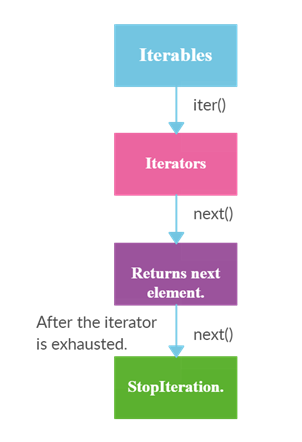

An iterator is also an iterable. It also has an __iter__() method. But this method returns iterator itself. That is __iter__ is an identity function. Thus, we can use iterator wherever we can use iterable. <br>
Generator is a function which returns a generator iterator. It looks like a normal function except that it contains yield expressions for producing a series of values usable in a for-loop or that can be retrieved one at a time with the next() function. <br>

In [ ]:
# 4.2 valid_ds and train_ds are data generators:

next(iter(valid_ds))

(<tf.Tensor: shape=(32, 100, 100, 3), dtype=float32, numpy=
 array([[[[3.00000000e+00, 3.00000000e+00, 2.90000000e+01],
          [3.00000000e+00, 3.00000000e+00, 2.90000000e+01],
          [2.15000010e+00, 3.15000010e+00, 2.86499996e+01],
          ...,
          [2.50000000e+00, 4.50000000e+00, 2.95000000e+01],
          [2.00000000e+00, 4.00000000e+00, 2.90000000e+01],
          [2.00000000e+00, 4.00000000e+00, 2.90000000e+01]],
 
         [[3.00000000e+00, 3.00000000e+00, 2.90000000e+01],
          [3.00000000e+00, 3.00000000e+00, 2.90000000e+01],
          [2.05000019e+00, 3.05000019e+00, 2.85499992e+01],
          ...,
          [2.50000000e+00, 4.50000000e+00, 2.95000000e+01],
          [2.00000000e+00, 4.00000000e+00, 2.90000000e+01],
          [2.00000000e+00, 4.00000000e+00, 2.90000000e+01]],
 
         [[3.00000000e+00, 3.00000000e+00, 2.90000000e+01],
          [3.00000000e+00, 3.00000000e+00, 2.90000000e+01],
          [2.00000000e+00, 3.00000000e+00, 2.85000000e+01],
    

In [ ]:
# 4.3
for image_batches, label_batches in train_ds:
  print(image_batches.shape)
  print(label_batches.shape)

(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3)
(32,)
(32, 100, 100, 3

In [ ]:
# 4.4 Get one batch:
for image_batches, label_batches in train_ds:
  ib = image_batches
  lb = label_batches
  break;

In [ ]:
# 4.5 Check batch shape:

ib.shape
print("\n==")
lb.shape

TensorShape([32, 100, 100, 3])


==


TensorShape([32])

In [ ]:
# 4.6 Convert ib to numpy array
ib.numpy()

array([[[[1.70000005e+00, 2.29999995e+00, 0.00000000e+00],
         [1.40000010e+00, 2.00000000e+00, 0.00000000e+00],
         [1.40000010e+00, 2.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[3.00000000e+00, 2.00000000e+00, 0.00000000e+00],
         [3.89999986e+00, 2.89999986e+00, 8.99999857e-01],
         [4.00000000e+00, 3.00000000e+00, 1.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[2.75250006e+00, 2.25250006e+00, 2.52499998e-01],
         [2.50000000e+00, 2.00000000e+00, 0.00000000e+00],
         [2.50000000e+00, 2.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [

## Build model

In [ ]:
# 5.0 Build model
model = Sequential(
                    [
                        tf.keras.layers.Input(shape = (100,100,3)),
                        tf.keras.layers.Rescaling(1.0/255.0),
                        tf.keras.layers.Resizing(height = 50, width = 50 ),
                        tf.keras.layers.Conv2D(32,(3,3), activation = 'relu' ),
                        tf.keras.layers.Conv2D(32,(3,3), activation = 'relu' ),
                        tf.keras.layers.Conv2D(32,(3,3), activation = 'relu' ),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(100, activation = 'relu'),
                        tf.keras.layers.Dense(10, activation = 'softmax')
                    ]

                  )

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 resizing (Resizing)         (None, 50, 50, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 61952)             0         
                                                                 
 dense (Dense)               (None, 100)               6

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

## Train model

In [ ]:
history = model.fit(train_ds,
                    epochs = 50,
                    validation_data = valid_ds
                    )

Epoch 1/50
92/92 [==============================] - 49s 517ms/step - loss: 1.6055 - accuracy: 0.3532 - val_loss: 1.2737 - val_accuracy: 0.4523
Epoch 2/50
92/92 [==============================] - 46s 496ms/step - loss: 1.2005 - accuracy: 0.5283 - val_loss: 0.9424 - val_accuracy: 0.6826
Epoch 3/50
92/92 [==============================] - 49s 529ms/step - loss: 0.9274 - accuracy: 0.6427 - val_loss: 0.7002 - val_accuracy: 0.7738
Epoch 4/50
92/92 [==============================] - 55s 597ms/step - loss: 0.6956 - accuracy: 0.7432 - val_loss: 0.5574 - val_accuracy: 0.8038
Epoch 5/50
92/92 [==============================] - 52s 559ms/step - loss: 0.4768 - accuracy: 0.8345 - val_loss: 0.3797 - val_accuracy: 0.9019
Epoch 6/50
92/92 [==============================] - 46s 498ms/step - loss: 0.3140 - accuracy: 0.8982 - val_loss: 0.4032 - val_accuracy: 0.9046
Epoch 7/50
92/92 [==============================] - 47s 503ms/step - loss: 0.1769 - accuracy: 0.9452 - val_loss: 0.5631 - val_accuracy: 0.8896